In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
startup_df = pd.read_csv("startup_data.csv")
display(startup_df.head(10))

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000,music,No,Yes,No,No,No,No,1.0000,No,acquired
1,CA,37.238916,-121.973718,1/1/2000,5.1260,9.9973,4.0,40100000,enterprise,Yes,No,No,Yes,Yes,Yes,4.7500,Yes,acquired
2,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,-2600000,web,No,No,Yes,No,No,No,4.0000,Yes,acquired
3,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000,software,No,No,No,Yes,Yes,Yes,3.3333,Yes,acquired
4,CA,37.779281,-122.419236,8/1/2010,NaN,1.6685,2.0,1300000,games_video,Yes,Yes,No,No,No,No,1.0000,Yes,closed
5,CA,37.406914,-122.090370,1/1/2002,NaN,4.5452,1.0,7500000,network_hosting,No,No,No,Yes,No,No,3.0000,Yes,closed
6,CA,37.391559,-122.070264,1/1/2005,1.7205,5.2110,3.0,26000000000,software,Yes,No,Yes,Yes,No,No,1.6667,Yes,acquired
7,CA,38.057107,-122.513742,1/1/2004,1.6466,6.7616,3.0,34100000,NaN,No,No,Yes,Yes,No,Yes,3.5000,Yes,acquired
8,MA,42.712207,-73.203599,1/1/2002,3.5863,11.1123,3.0,9650000,NaN,Yes,No,Yes,No,No,Yes,NaN,Yes,acquired
9,CA,37.427235,-122.145783,6/1/2005,1.6712,4.6849,3.0,5750000,NaN,Yes,Yes,Yes,No,No,No,NaN,Yes,acquired


## Data Description

- state_code: kode state startup
- latitude: posisi latitude startup
- longitude: posisi longitude startup
- founded_at: tanggal ketika startup tersebut didirikan
- age_first_funding_year: umur startup dalam tahun ketika pertama kali mendapatkan funding
- age_last_funding_year: umur startup dalam tahun ketika terakhir kali mendapatkan funding
- funding_rounds: banyaknya funding yang diterima oleh startup 
- funding_total_usd: jumlah funding yang diterima oleh startup dalam USD
- category_code: bidang yang menjadi fokus dari startup
- has_VC: apakah startup tersebut memiliki venture capital
- has_angel: apakah startup tersebut memiliki angel investor
- has_seriesA: apakah startup tersebut mendapatkan funding series A
- has_seriesB: apakah startup tersebut mendapatkan funding series B
- has_seriesC: apakah startup tersebut mendapatkan funding series C
- has_seriesD: apakah startup tersebut mendapatkan funding series D
- avg_participants: rata-rata banyak pengguna dari startup tersebut dalam juta
- is_top500: apakah startup tersebut pernah masuk ke dalam 500 startup dengan peringkat teratas di Amerika
- status (target): status dari startup tersebut sekarang, acquired berarti startup tersebut berhasil karena diakuisisi oleh organisasi lain, sebaliknya, closed berarti startup tersebut sudah berhenti beroperasi dan gagal

In [4]:
startup_df.dtypes

state_code                 object
latitude                  float64
longitude                 float64
founded_at                 object
age_first_funding_year    float64
age_last_funding_year     float64
funding_rounds            float64
funding_total_usd           int64
category_code              object
has_VC                     object
has_angel                  object
has_seriesA                object
has_seriesB                object
has_seriesC                object
has_seriesD                object
avg_participants          float64
is_top500                  object
status                     object
dtype: object

In [5]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              949 non-null    object 
 1   latitude                949 non-null    float64
 2   longitude               949 non-null    float64
 3   founded_at              949 non-null    object 
 4   age_first_funding_year  885 non-null    float64
 5   age_last_funding_year   894 non-null    float64
 6   funding_rounds          946 non-null    float64
 7   funding_total_usd       949 non-null    int64  
 8   category_code           897 non-null    object 
 9   has_VC                  949 non-null    object 
 10  has_angel               949 non-null    object 
 11  has_seriesA             949 non-null    object 
 12  has_seriesB             949 non-null    object 
 13  has_seriesC             949 non-null    object 
 14  has_seriesD             949 non-null    ob

In [6]:
startup_df.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,avg_participants
count,949.000000,949.000000,885.000000,894.000000,946.000000,9.490000e+02,901.000000
mean,38.530398,-103.465916,2.322209,3.987377,2.313953,1.544590e+09,2.857545
std,3.756150,22.382011,2.941926,3.313172,1.402098,2.446676e+10,1.875341
min,25.752358,-122.756956,-9.046600,-9.046600,1.000000,-9.500000e+06,1.000000
25%,37.388869,-122.200914,0.517800,1.690375,1.000000,2.700000e+06,1.500000
50%,37.779281,-118.354605,1.424700,3.494500,2.000000,1.000000e+07,2.500000
75%,40.730646,-77.212493,3.602700,5.543150,3.000000,2.490000e+07,4.000000
max,59.335232,18.057121,34.490400,34.490400,10.000000,6.423100e+11,16.000000


In [7]:
startup_df.shape

(949, 18)

## Data Preprocessing

* Redundant Data

In [8]:
print(f"Jumlah data redundan {startup_df.duplicated().sum()}")

Jumlah data redundan 26


In [9]:
startup_df.drop_duplicates(inplace=True)

In [10]:
startup_df.shape

(923, 18)

In [11]:
print(f"Jumlah data redundan {startup_df.duplicated().sum()}")

Jumlah data redundan 0


* Missing values

In [12]:
startup_df.isnull().sum()

state_code                 0
latitude                   0
longitude                  0
founded_at                 0
age_first_funding_year    60
age_last_funding_year     55
funding_rounds             3
funding_total_usd          0
category_code             48
has_VC                     0
has_angel                  0
has_seriesA                0
has_seriesB                0
has_seriesC                0
has_seriesD                0
avg_participants          48
is_top500                  0
status                     0
dtype: int64

Since the sum of null values are much enough, we can't drop the rows. Hence, we fill the null values with mean as not disrupt the data distribution. 

In [13]:
mean_affy = startup_df['age_first_funding_year'].mean()
startup_df['age_first_funding_year'].fillna(mean_affy, inplace=True)

In [14]:
mean_alfy = startup_df['age_last_funding_year'].mean()
startup_df['age_last_funding_year'].fillna(mean_alfy, inplace=True)

In [15]:
startup_df['category_code'].value_counts().idxmax()

'web'

In [16]:
startup_df['category_code'].fillna('web', inplace=True)

In [17]:
mean_ap = startup_df['avg_participants'].mean()
startup_df['avg_participants'].fillna(mean_ap, inplace=True)

Special condition: the funding rounds only has 3 null values so we can ignore them.

In [18]:
startup_df.dropna(inplace=True)

In [19]:
startup_df.isnull().sum()

state_code                0
latitude                  0
longitude                 0
founded_at                0
age_first_funding_year    0
age_last_funding_year     0
funding_rounds            0
funding_total_usd         0
category_code             0
has_VC                    0
has_angel                 0
has_seriesA               0
has_seriesB               0
has_seriesC               0
has_seriesD               0
avg_participants          0
is_top500                 0
status                    0
dtype: int64

## Exploratory Data Analysis

In [20]:
df2 = startup_df[['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd']]
df2.describe()

,age_first_funding_year,age_last_funding_year,funding_total_usd
count,920.000000,920.000000,9.200000e+02
mean,2.326420,4.000726,1.592146e+09
std,2.847659,3.216783,2.484830e+10
min,-9.046600,-9.046600,-9.500000e+06
25%,0.586300,1.869850,2.737500e+06
50%,1.671200,3.742450,1.000000e+07
75%,3.388350,5.332875,2.492500e+07
max,34.490400,34.490400,6.423100e+11


There's anomaly condition where the minimum value of age_first_funding_year and age_last_funding_year is minus. That can't be true, we should replace it. 

In [21]:
startup_df['age_first_funding_year'].describe()

count    920.000000
mean       2.326420
std        2.847659
min       -9.046600
25%        0.586300
50%        1.671200
75%        3.388350
max       34.490400
Name: age_first_funding_year, dtype: float64

Look is there any outlier or not.

In [22]:
Q1 = startup_df['age_first_funding_year'].quantile(0.25)
Q3 = startup_df['age_first_funding_year'].quantile(0.75)
IQR = (Q3 - Q1)
startup_df.loc[(startup_df['age_first_funding_year'] < (Q1 - 1.5 * IQR)) | (startup_df['age_first_funding_year'] > (Q3 + 1.5 * IQR))]


,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
76,CA,37.354469,-121.990433,1/1/1998,9.1671,9.197300,2.0,17800000,software,Yes,No,No,No,No,No,1.0000,Yes,closed
87,MI,42.350749,-83.444589,1/1/2001,7.8877,10.665800,3.0,42700000,cleantech,Yes,No,No,Yes,No,No,3.6667,Yes,closed
100,GA,34.070958,-84.274733,1/1/1985,20.8055,20.805500,1.0,32000000,web,No,No,No,Yes,No,No,7.0000,Yes,closed
116,CA,37.584103,-122.366082,1/1/1997,10.7589,4.003692,1.0,2000000,biotech,No,No,No,No,No,No,1.0000,No,closed
185,CA,37.779281,-122.419236,1/1/2001,10.5315,10.531500,1.0,2600000,mobile,Yes,No,No,No,No,No,1.0000,Yes,closed
214,NY,40.730646,-73.986614,1/1/1996,11.3342,11.334200,1.0,7410000,biotech,Yes,No,No,No,No,No,3.0000,Yes,closed
264,TX,30.161661,-95.471256,1/1/1992,16.4192,16.419200,1.0,6000000,cleantech,No,No,No,Yes,No,No,3.0000,No,closed
333,CA,32.901049,-117.192656,1/1/1996,11.4329,11.432900,1.0,20000000,hardware,No,No,No,No,Yes,No,5.0000,Yes,closed
346,CA,37.779281,-122.419236,1/1/1999,9.3534,12.405500,3.0,30300000,games_video,Yes,No,No,No,No,Yes,4.5000,Yes,closed
387,MA,42.375640,-71.235800,1/1/1998,7.6932,14.032900,3.0,24150000,software,Yes,No,Yes,Yes,No,No,2.3333,Yes,closed


## Data Visualization

**Find the year where most startups have been established**

In [23]:
df_copy = startup_df[['state_code', 'category_code', 'founded_at']].copy()
df_copy.head()

,state_code,category_code,founded_at
0,CA,music,1/1/2007
1,CA,enterprise,1/1/2000
2,CA,web,3/18/2009
3,CA,software,1/1/2002
4,CA,games_video,8/1/2010


In [24]:
df_copy['founded_at'] = pd.to_datetime(df_copy['founded_at'])
df_copy['day'] = df_copy['founded_at'].dt.day
df_copy['month'] = df_copy['founded_at'].dt.month
df_copy['year'] = df_copy['founded_at'].dt.year

In [25]:
df_copy.head()

,state_code,category_code,founded_at,day,month,year
0,CA,music,2007-01-01,1,1,2007
1,CA,enterprise,2000-01-01,1,1,2000
2,CA,web,2009-03-18,18,3,2009
3,CA,software,2002-01-01,1,1,2002
4,CA,games_video,2010-08-01,1,8,2010


In [26]:
counts = df_copy['year'].value_counts().reset_index().rename(columns={"index": "year", 0: "count"})

In [27]:
counts.head()

,year,count
0,2006,107
1,2007,104
2,2005,102
3,2008,87
4,2009,82


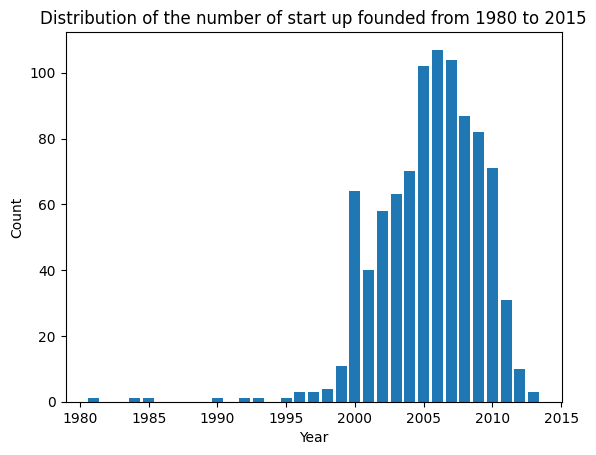

In [47]:
plt.bar(counts['year'], counts['count'])
plt.title("Distribution of the number of start up founded from 1980 to 2015")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

The era of growth in establishing a start up reached its peak from 2005 to 2008.

**Find the category startup that was founded between 2005 to 2008**

In [33]:
data = df_copy[(df_copy['year'] <= 2008) & (df_copy['year'] >= 2005)]
data = data['category_code'].value_counts().reset_index().rename(columns={"index": "category", 0: "count"})
data

,category_code,count
0,web,90
1,software,54
2,advertising,31
3,mobile,31
4,enterprise,29
5,games_video,28
6,network_hosting,17
7,cleantech,16
8,biotech,11
9,ecommerce,11


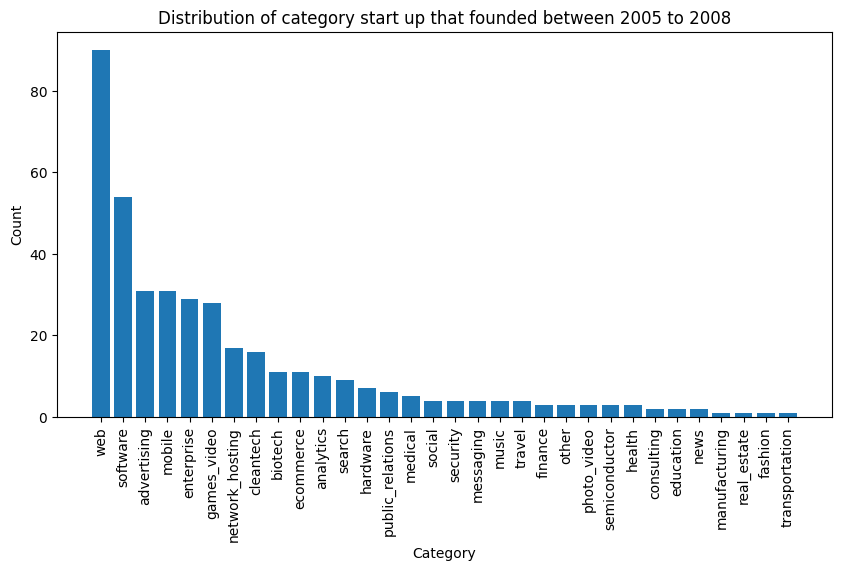

In [46]:
plt.figure(figsize=(10,5))
plt.bar(data['category_code'], data['count'])
plt.title("Distribution of category start up that founded between 2005 to 2008")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()